In [2]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from statistics import mean 
import warnings
warnings.filterwarnings('ignore')

def read_gwChange(dir_name):
    headers = ['time','gateway']
    
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        gw_data['round'] = list(range(len(gw_data)))
        data = data.append(gw_data)
    
    returnData = pd.DataFrame()
    
    for name, group  in data.groupby([data['gateway']]):
        temp = pd.DataFrame()
        t = group['time'].groupby([group['round']]).count()
        temp['count'] = t
        temp['gateway'] = name
        returnData = returnData.append(temp)
    return returnData   


def getECDF(df, attr):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[attr].value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

8512


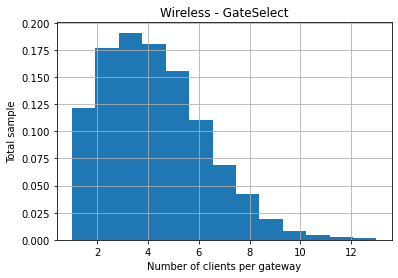

1 955
2 1390
3 1499
4 1414
5 1225
6 867
7 543
8 328
9 152
10 67
11 37
12 23
13 12


In [50]:
import seaborn as sns

wirelessData = pd.DataFrame()

data = read_gwChange("combine/wireless/gateselect/r1/gwChange")
wirelessData = wirelessData.append(data)

data = read_gwChange("combine/wireless/gateselect/r2/gwChange")
wirelessData = wirelessData.append(data)


data = read_gwChange("combine/wireless/gateselect/r3/gwChange")
wirelessData = wirelessData.append(data)

data = read_gwChange("combine/wireless/gateselect/r4/gwChange")
wirelessData = wirelessData.append(data)

data = read_gwChange("combine/wireless/gateselect/r5/gwChange")
wirelessData = wirelessData.append(data)


data = read_gwChange("combine/wireless/gateselect/r6/gwChange")
wirelessData = wirelessData.append(data)

data = read_gwChange("combine/wireless/gateselect/r7/gwChange")
wirelessData = wirelessData.append(data)

data = read_gwChange("combine/wireless/gateselect/r8/gwChange")
wirelessData = wirelessData.append(data)

data = read_gwChange("combine/wireless/gateselect/r9/gwChange")
wirelessData = wirelessData.append(data)

wirelessGateSelect = wirelessData.assign(Type='GateSelect')

print(len(wirelessGateSelect))

plt.xlabel('Number of clients per gateway')
plt.ylabel('Total sample')

wirelessGateSelect['count'].hist(bins=13,density=True)
plt.title('Wireless - GateSelect')
plt.show()

#sns.swarmplot(x="gateway", y="count",data=wirelessData)

#print(wirelessData[['count','gateway']])

#ax = sns.heatmap(wirelessData['count'].to_frame())
for name, group in wirelessGateSelect.groupby(['count']):
    print(name, len(group))

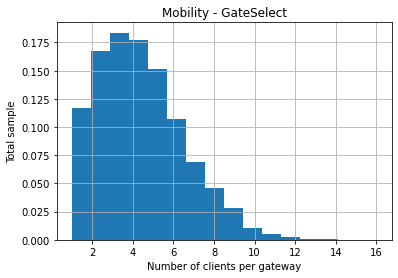

1 932
2 1338
3 1465
4 1412
5 1210
6 857
7 547
8 369
9 223
10 85
11 38
12 23
13 4
14 3
15 1
16 1


In [51]:
import seaborn as sns

wirelessData = pd.DataFrame()

data = read_gwChange("combine/mobility/gateselect/r1/gwChange")
wirelessData = wirelessData.append(data)

data = read_gwChange("combine/mobility/gateselect/r2/gwChange")
wirelessData = wirelessData.append(data)


data = read_gwChange("combine/mobility/gateselect/r3/gwChange")
wirelessData = wirelessData.append(data)

data = read_gwChange("combine/mobility/gateselect/r4/gwChange")
wirelessData = wirelessData.append(data)

data = read_gwChange("combine/mobility/gateselect/r5/gwChange")
wirelessData = wirelessData.append(data)


data = read_gwChange("combine/mobility/gateselect/r6/gwChange")
wirelessData = wirelessData.append(data)

data = read_gwChange("combine/mobility/gateselect/r7/gwChange")
wirelessData = wirelessData.append(data)

data = read_gwChange("combine/mobility/gateselect/r8/gwChange")
wirelessData = wirelessData.append(data)

data = read_gwChange("combine/wireless/gateselect/r9/gwChange")
mobilityData = wirelessData.append(data)


mobilityData.hist(bins=16, density=True)
plt.xlabel('Number of clients per gateway')
plt.ylabel('Total sample')
plt.title('Mobility - GateSelect')
plt.show()


for name, group in mobilityData.groupby(['count']):
    print(name,len(group))
#sns.distplot(wirelessData['count'])
#plt.xlim(0,18)
#plt.show()



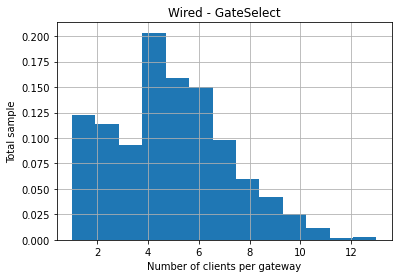

1 192
2 178
3 146
4 318
5 248
6 234
7 154
8 94
9 66
10 40
11 18
12 2
13 4


In [52]:
import seaborn as sns

wirelessData = pd.DataFrame()

data = read_gwChange("combine/wired/gateselect/r1/gwChange")
wirelessData = wirelessData.append(data)

#data = read_gwChange("combine/wired/gateselect/r2/gwChange")
#wirelessData = wirelessData.append(data)


#data = read_gwChange("combine/wired/gateselect/r3/gwChange")
#wirelessData = wirelessData.append(data)

#data = read_gwChange("combine/wired/gateselect/r4/gwChange")
#wirelessData = wirelessData.append(data)

#data = read_gwChange("combine/mobility/gateselect/r5/gwChange")
#wirelessData = wirelessData.append(data)


#data = read_gwChange("combine/mobility/gateselect/r6/gwChange")
#wirelessData = wirelessData.append(data)

#data = read_gwChange("combine/mobility/gateselect/r7/gwChange")
#wirelessData = wirelessData.append(data)

#data = read_gwChange("combine/mobility/gateselect/r8/gwChange")
#wirelessData = wirelessData.append(data)

#data = read_gwChange("combine/wireless/gateselect/r9/gwChange")

wiredData = wirelessData.append(data)

wiredData.hist(bins=13,density=True)
plt.xlabel('Number of clients per gateway')
plt.ylabel('Total sample')
plt.title('Wired - GateSelect')
plt.show()


for name, group in wiredData.groupby(['count']):
    print(name,len(group))



<AxesSubplot:xlabel='round', ylabel='count'>

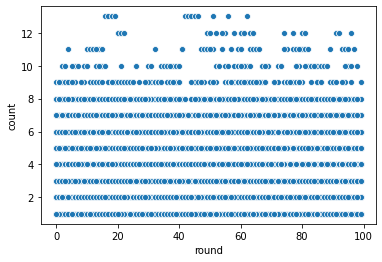

In [55]:
import seaborn as sns

sns.scatterplot(x="round", y="count", data=wirelessGateSelect.reset_index())

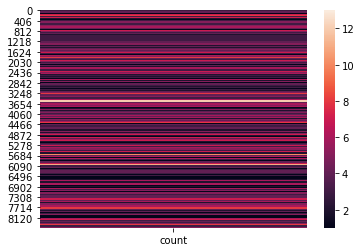

In [64]:
ax = sns.heatmap(wirelessGateSelect.reset_index()[['count']])